In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/1100-instagram-users-datetime-posts-data/Instagram_Data.csv


<h1>Required modules</h1>
<i>Here is a list of dependencies used</i>
<ul>
    <li>pandas</li>
    <li>pyplot</li>
    <li>numpy</li>
    <li>seaborn</li>
</ul>
    

In [2]:
!pip install calmap
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import datetime
import calendar

In [3]:
df=pd.read_csv('../input/1100-instagram-users-datetime-posts-data/Instagram_Data.csv')
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37


<h1>Computing the derived column day of the week</h1>

In [4]:
def foo(date):
    date=date.split(' ')[0]
    born = datetime.datetime.strptime(date, '%Y-%m-%d').weekday()
    return (calendar.day_name[born])

ide=[foo(x) for x in df['Date Posted']]
df['Day_of_week']=ide
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,Day_of_week
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,Sunday
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,Sunday
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18,Friday
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40,Thursday
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40,Thursday
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59,Wednesday
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27,Wednesday
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37,Wednesday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
 13  Day_of_week            178922 non-null  object 
dtypes: float64(1), int64(10), object(3)


In [6]:
df.describe()

,User uuid,Likes,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
count,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000
mean,546.316948,4.298806e+04,447.477510,0.270961,3.578045,5.622285e+02,2019.412107,6.764814,15.694219,13.396435,28.741737
std,317.200142,2.604648e+05,492.620418,0.210007,6.877008,1.201380e+04,1.374731,3.753390,8.824645,7.385343,17.678904
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,273.000000,1.340000e+02,107.000000,0.100000,0.000000,4.000000e+00,2019.000000,3.000000,8.000000,7.000000,13.000000
50%,540.000000,1.064000e+03,260.000000,0.220000,0.000000,2.300000e+01,2020.000000,7.000000,16.000000,16.000000,29.000000
75%,829.000000,1.074300e+04,612.000000,0.390000,3.000000,1.357500e+02,2020.000000,10.000000,23.000000,20.000000,44.000000
max,1089.000000,1.544569e+07,3775.000000,1.000000,31.000000,2.907644e+06,2021.000000,12.000000,31.000000,23.000000,59.000000


Text(0, 0.5, 'Likes')

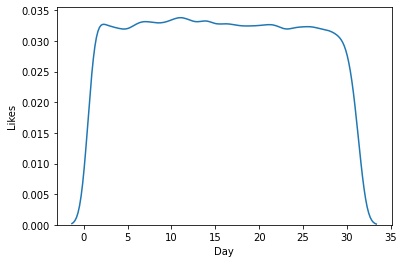

In [7]:
sns.kdeplot(df.Day)
plt.ylabel('Likes')

<h3>We see below that for each type of post the graph shows a similar curve when plotted againt Hour</h3>

<AxesSubplot:xlabel='Hour', ylabel='Density'>

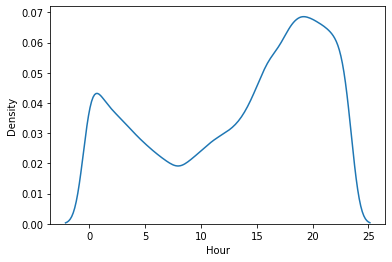

In [8]:
sns.kdeplot(x=df.query("Type == 'Image'").Hour)

<AxesSubplot:xlabel='Hour', ylabel='Density'>

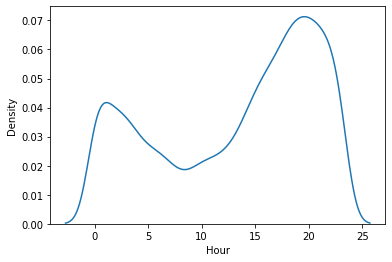

In [9]:
sns.kdeplot(x=df.query("Type == 'Images'").Hour)

<AxesSubplot:xlabel='Hour', ylabel='Density'>

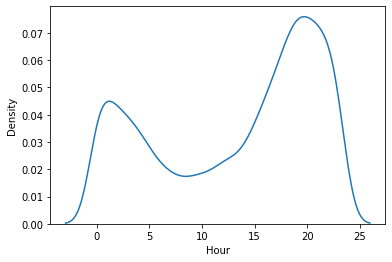

In [10]:
sns.kdeplot(x=df.query("Type == 'Video'").Hour)

<h3>Since social media was not popular before 2018, we consider the calendar map after 2018. We see that more likes are seen towards the end of each year and also comparitively more likes during the weekends.</h3>

(<Figure size 1440x720 with 4 Axes>,
 array([<AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>,
        <AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

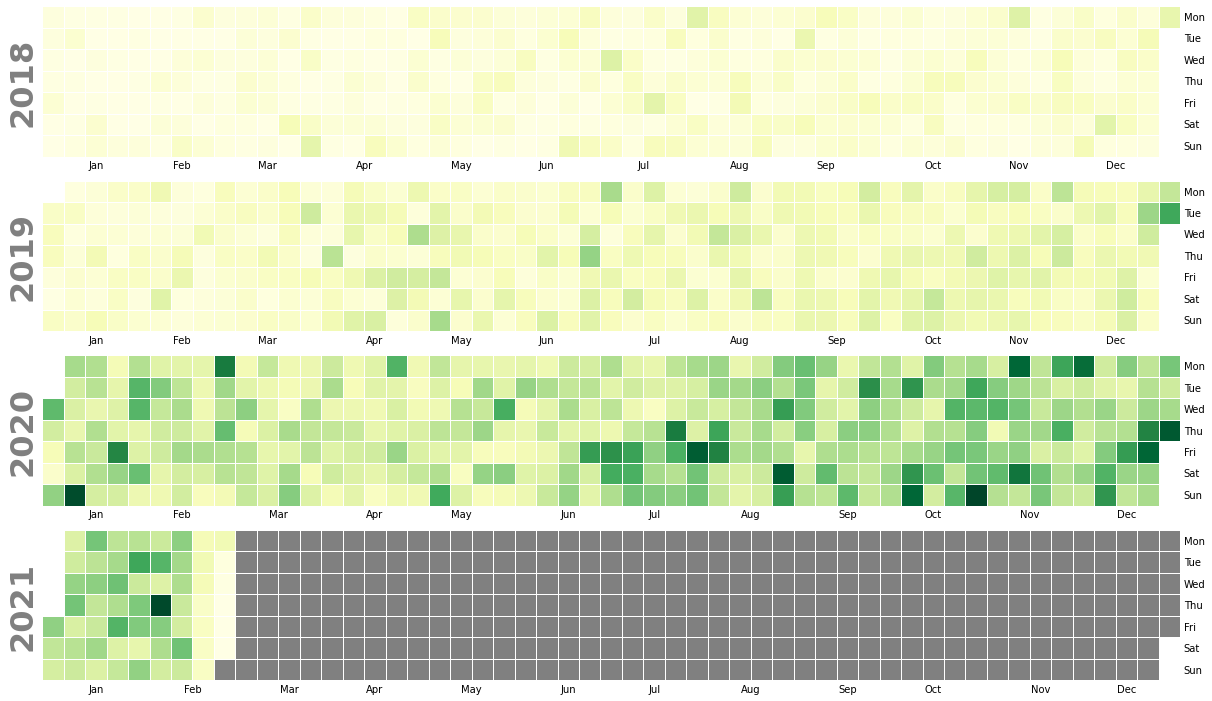

In [11]:
x=df.set_index('Date Posted')
x=x.loc[x.Year>2017]
x.index = pd.to_datetime(x.index)
calmap.calendarplot(x['Likes'], fig_kws=dict(figsize=(20, 10)), cmap='YlGn',fillcolor='grey')

In [12]:
len(x)

161217

<h3>The above calendar map may differ for different type of posts</h3>
<p>So we check sum of likes for all months, for each type of post individually</p>

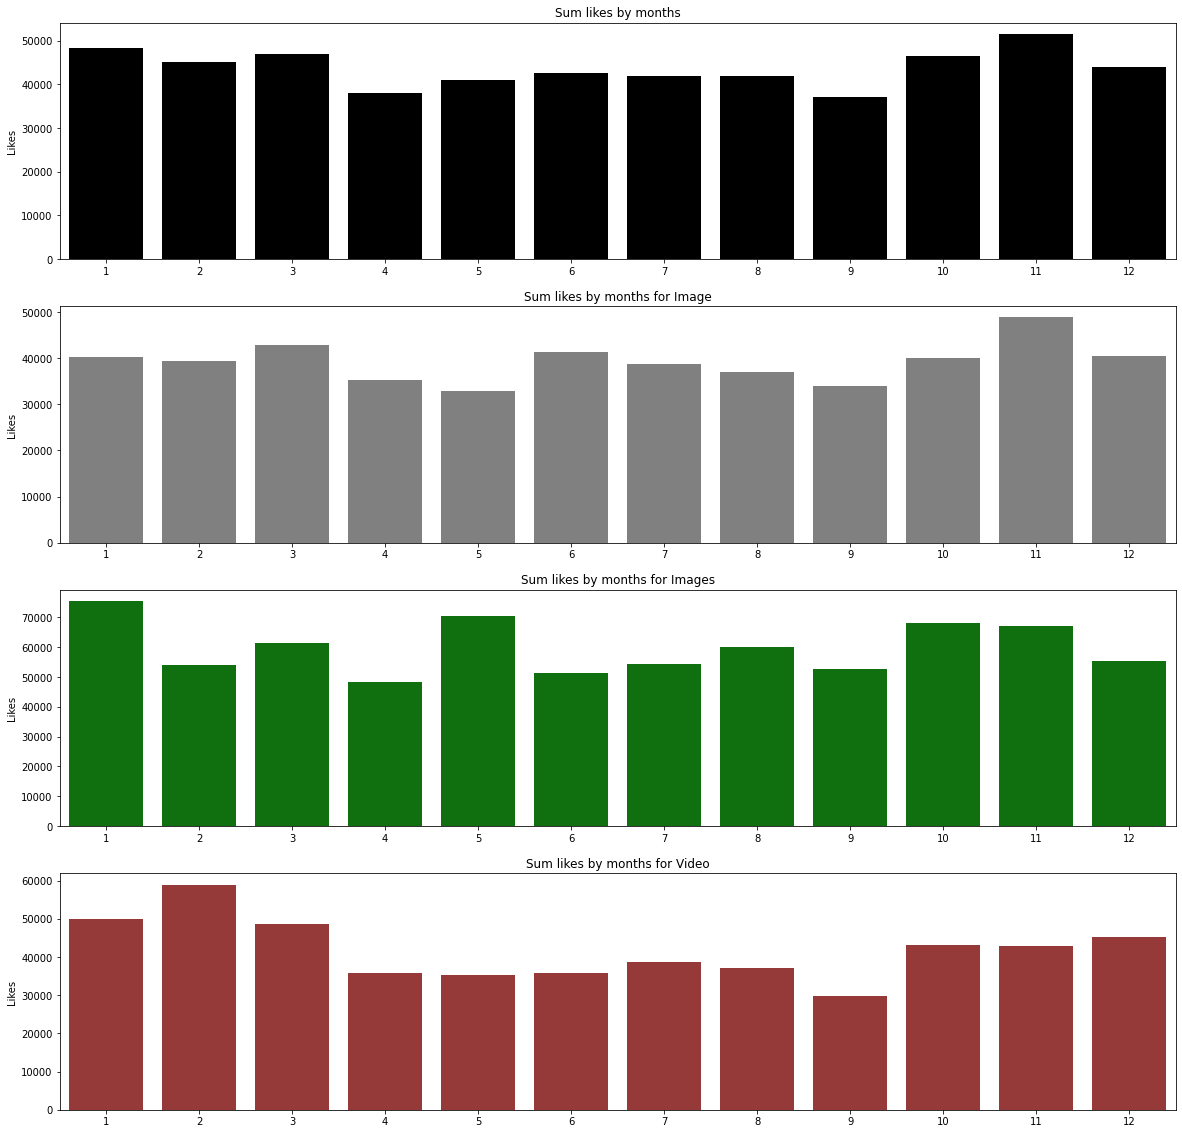

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(20, 20))
months=df.Month.unique()
sns.barplot(x=months, y=df.groupby('Month')['Likes'].mean(), ax=ax[0], color='black')
ax[0].title.set_text('Sum likes by months')

sns.barplot(x=months, y=df.query("Type == 'Image'").groupby('Month')['Likes'].mean(), ax=ax[1], color="grey")
ax[1].title.set_text('Sum likes by months for Image')

sns.barplot(x=months, y=df.query("Type == 'Images'").groupby('Month')['Likes'].mean(), ax=ax[2], color="green")
ax[2].title.set_text('Sum likes by months for Images')

sns.barplot(x=months, y=df.query("Type == 'Video'").groupby('Month')['Likes'].mean(), ax=ax[3], color="brown")
ax[3].title.set_text('Sum likes by months for Video')

<h1>The dataset has no null values and hence no more cleaning of data is required</h1>

In [14]:
df.isnull().any()

User uuid                False
Likes                    False
Days passed from post    False
Likes Score              False
Type                     False
Numer of Tags            False
Numer of Comments        False
Date Posted              False
Year                     False
Month                    False
Day                      False
Hour                     False
Minute                   False
Day_of_week              False
dtype: bool

<h1>Scatter plots are done to see correlation between different attributes and target variable</h1>

Text(0, 0.5, 'Comments')

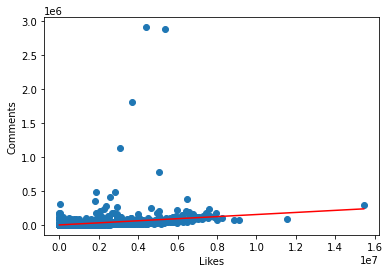

In [15]:
plt.scatter(df.Likes, df['Numer of Comments'])
plt.plot(np.unique(df.Likes), 
         np.poly1d(np.polyfit(df.Likes, df['Numer of Comments'], 1))
         (np.unique(df.Likes)), color='red')
plt.xlabel('Likes')
plt.ylabel('Comments')